# MIS48 Group 6
## Jheel Jagani
## Sudha Rani Seeli
## Madison L Rundell
## Michael Byrd

# Import Libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import sqlite3
from sqlalchemy import create_engine, Table, MetaData
from sqlalchemy.orm import sessionmaker

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


# Establish Directory

In [2]:
os.getcwd()

'/Users/michaelbyrd/Desktop/MIS548'

In [3]:
os.chdir('/Users/michaelbyrd/Desktop/MIS548/Million Songs')

In [4]:
os.getcwd()

'/Users/michaelbyrd/Desktop/MIS548/Million Songs'

# Functions

In [5]:
# Function for Complete Breakdown
def breakdown(df):
    # print("Head", "\n", df.head())
    # print("Tail", "\n", df.tail())
    # print("\n\n", "Columns", "\n", df.columns)
    # print("\n\n", "Describe", "\n", df.describe)
    print("\n\n\n", "Correlation Matrix", "\n", df.corr())
    # print("\n\n\n", "Info", "\n", df.info())
    print("\n\n\n", "Distinct Count", "\n", df.nunique())
    print("\n\n\n", "Count", "\n", df.count())
    print("\n\n\n", "DTypes", "\n", df.dtypes)
    print("\n\n\n", "Shape", "\n", df.shape)
    print("\n\n\n", "Nulls", "\n", df.isna().sum())
    print("\n\n\n", "Null %", "\n", round(df.isna().sum()/len(df)*100, 2))
    # print("\n\n\n", "Mean", "\n", df.mean())
    # print("\n\n\n", "Median", "\n", df.median())
    # print("\n\n\n", "Standard Deviation", "\n", df.std())
    # print("\n\n\n", "Max", "\n", df.max())
    # print("\n\n\n", "Min", "\n", df.min())

# SQLite

In [6]:
tm_con = sqlite3.connect("track_metadata.db")

In [7]:
tm_cur = tm_con.cursor()

In [8]:
# Query to fetch table names from the master table
tm_cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
tables = tm_cur.fetchall()

# Print the table names
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
songs


In [9]:
# Select all data from the table
df = pd.read_sql('SELECT * FROM songs', tm_con)
df.head(3)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0


In [10]:
# Close Connection
tm_con.close()

# Data Modeling

In [11]:
breakdown(df)




 Correlation Matrix 
                     duration  artist_familiarity  artist_hotttnesss      year  \
duration            1.000000           -0.006291          -0.001348 -0.021238   
artist_familiarity -0.006291            1.000000           0.721535  0.304309   
artist_hotttnesss  -0.001348            0.721535           1.000000  0.294561   
year               -0.021238            0.304309           0.294561  1.000000   
track_7digitalid    0.028060           -0.111917          -0.092447 -0.088092   
shs_perf           -0.018049            0.034699           0.039137  0.037160   
shs_work           -0.017475            0.039594           0.041278  0.037016   

                    track_7digitalid  shs_perf  shs_work  
duration                    0.028060 -0.018049 -0.017475  
artist_familiarity         -0.111917  0.034699  0.039594  
artist_hotttnesss          -0.092447  0.039137  0.041278  
year                       -0.088092  0.037160  0.037016  
track_7digitalid            1.0

In [12]:
# Sorting by a specific column
df.sort_values(by='year', ascending=False, inplace = True)

In [13]:
df = df[['title', 'song_id', 'release',	'artist_id','artist_name', 'duration', 'artist_familiarity','artist_hotttnesss', 'year']]

In [14]:
# Convert duration from seconds to minutes
df['duration_minutes'] = df['duration'] / 60
df = df.rename({'artist_hotttnesss':'score'}, axis=1)

# Create a new column by combining 'artist_familiarity' and 'artist_score'
# df['combined_fam_score'] = df['artist_familiarity'] + df['score']

# Create a new column by showing the difference between 'artist_familiarity' and 'artist_score'
df['difference_fam_score'] = df['artist_familiarity'] - df['score']

# Create a new column by combining 'artist_name' and 'release'
df['artist_release'] = df['artist_name'] + ' - ' + df['release']


In [15]:
# Filter songs out that have year 0 & 2011
df = df[(df['year'] != 0) & (df['year'] != 2011)]

# Remove rows with negative values in 'artist_familiarity' or 'score'
df = df[(df['artist_familiarity'] > 0) & (df['score'] > 0)]

df

,title,song_id,release,artist_id,artist_name,duration,artist_familiarity,score,year,duration_minutes,difference_fam_score,artist_release
751349,Out Of The Blue 2010,SOCHFMY12AB018975B,Out Of The Blue,ARGBB761187B9AEFE9,System F,185.93914,0.620266,0.388497,2010,3.098986,0.231770,System F - Out Of The Blue
459553,Intermission 2,SOATBYN12AB01895C0,Life Is Sweet! Nice To Meet You,AROLOHV1187FB4231D,Lightspeed Champion,38.60853,0.727369,0.481055,2010,0.643475,0.246314,Lightspeed Champion - Life Is Sweet! Nice To M...
77355,For Annabelle,SODESHG12AB0186969,Infinite Arms,ARIUYZD1187FB59892,Band Of Horses,186.12200,0.767081,0.593106,2010,3.102033,0.173975,Band Of Horses - Infinite Arms
893765,The Visitor,SORVIEW12AB018B5E0,Betrayal_ Justice; Revenge,ARG1X0Q1187FB57C48,Kivimetsän Druidi,241.21424,0.593914,0.414141,2010,4.020237,0.179773,Kivimetsän Druidi - Betrayal_ Justice; Revenge
515118,Ironbound,SOOCBAK12AB018CA8B,Ironbound,ARIZ6AI1187FB5197C,Overkill,393.03791,0.686395,0.510050,2010,6.550632,0.176345,Overkill - Ironbound
...,...,...,...,...,...,...,...,...,...,...,...,...
752228,Mandela You're Free,SOEHRCG12A81C21A2A,Turning Point,AR1SUNB1187FB41BC8,Barrington Levy,224.91383,0.669587,0.414859,1922,3.748564,0.254728,Barrington Levy - Turning Point
38428,Warm And Sunny Day,SOAQIEA12A81C21A18,Turning Point,AR1SUNB1187FB41BC8,Barrington Levy,243.82649,0.669587,0.414859,1922,4.063775,0.254728,Barrington Levy - Turning Point
734419,Don't Pan Me,SODAWZF12A6D4FCB4B,Alberta Hunter Vol. 1 (1921-1923),ARMCOBI1187B9A0BC8,Alberta Hunter,180.40118,0.489134,0.349621,1922,3.006686,0.139513,Alberta Hunter - Alberta Hunter Vol. 1 (1921-1...
286039,Warm And Sunny Day,SODIEDT12AB018A10D,Black & White Vol. 2: Reggae Classics,AR1SUNB1187FB41BC8,Barrington Levy,217.33832,0.669587,0.414859,1922,3.622305,0.254728,Barrington Levy - Black & White Vol. 2: Reggae...


## Data Exploration

In [16]:
# Get all distinct values in the 'year' column
distinct_years = df['year'].unique()

# Display the result
print(distinct_years)

[2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997
 1996 1995 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983
 1982 1981 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969
 1968 1967 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955
 1954 1953 1952 1951 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941
 1940 1939 1938 1937 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927
 1926 1925 1924 1922]


In [17]:
# Group by 'song_id' and count occurrences
song_id_counts = df['song_id'].value_counts()

# Display the result with the most occurrences at the top


#print(song_id_counts.to_string())

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(song_id_counts)

# Filter and display only results with counts greater than 1
result_greater_than_1 = song_id_counts[song_id_counts > 1]

# Display the filtered result
print(result_greater_than_1)

SOPNWKG12AB017DE3F    3
SOPYODE12A8C13EB37    3
SOEGQML12AF7299C84    3
SOFDFMX12A5891F74F    3
SOEHQBQ12A6D4F9EA9    3
                     ..
SONPVDQ12A8C13EB31    2
SOJGVOS12A6D4F91D4    2
SOINJVD12A6D4F91D3    2
SOVCULT12A8C13AAC6    2
SOFYRYZ12A8C136B9B    2
Name: song_id, Length: 728, dtype: int64


In [18]:
# Group by 'song_id', 'title' and count occurrences
song_artist_counts = df[['title', 'artist_name']].value_counts()


# Filter and display only results with counts greater than 1
results_greater_than_1 = song_artist_counts[song_artist_counts > 1]

# Display the filtered result
print(results_greater_than_1)

title                      artist_name    
Untitled                   Der Blutharsch     87
                           7000 Dying Rats    31
Greece 2000                Three Drives       28
The Age Of Love            Age Of Love        20
Infinity                   Yves Deruyter      19
                                              ..
Love Lies In Ashes         Carnifex            2
Musica Universalis         Mike Oldfield       2
Where Do You Start         Shirley Horn        2
Already Been To The Water  Vickie Winans       2
Mucky Star                 Elektrochemie       2
Length: 31748, dtype: int64


In [19]:
# Sort the DataFrame by 'duration' from longest to shortest
sorted_df = df.sort_values(by='duration', ascending=False)

# Display the result
print(sorted_df[['year', 'release', 'title', 'artist_name', 'artist_familiarity', 'score', 'difference_fam_score', 'duration_minutes']])

        year                   release                           title  \
725906  2005              Monolithe II                    Monolithe II   
459327  2009                  Mixshake                        Mixshake   
963219  2006           Warlords of Pez                   World Control   
729758  2007            El Camino Real                  El Camino Real   
507830  2005  The Garden Of Brokenness        The Garden Of Brokenness   
...      ...                       ...                             ...   
827416  2006             Adam Arcuragi       The Screen (Philadelphia)   
893883  2002                   Rip It!                            Holy   
43732   2009                    Animal                          Animal   
119701  2008                    Public  Bernard Lavilliers [En Public]   
827893  2004                    Indigo          Rainy Days And Mondays   

               artist_name  artist_familiarity     score  \
725906           Monolithe            0.462751  0.2

In [20]:
# Group by 'year' and get the count of songs for each year
songs_per_year = df.groupby('year').size()

# Sort by descending count
songs_per_year = songs_per_year.sort_values(ascending=False)


# Display the result
print(songs_per_year.to_string())

year
2007    38597
2006    36613
2008    34050
2005    34032
2009    30320
2004    28993
2003    26910
2002    22813
2001    20998
2000    18797
1999    17860
1998    15394
1997    14755
1996    13814
1995    12979
1994    11766
1993    10302
1992     9362
2010     9261
1991     8494
1990     7139
1989     6599
1988     5563
1987     5071
1986     4180
1982     3574
1985     3557
1983     3358
1984     3336
1981     3095
1979     3056
1980     3040
1978     2880
1973     2526
1977     2492
1975     2418
1970     2304
1972     2274
1969     2175
1974     2160
1976     2132
1971     2094
1968     1855
1967     1710
1966     1364
1965     1112
1964      927
1963      890
1962      600
1959      590
1957      580
1958      578
1961      571
1956      561
1960      423
1955      272
1953      132
1954      122
1929       90
1950       84
1952       76
1951       74
1949       60
1947       57
1928       52
1940       52
1927       43
1948       42
1930       40
1931       35
1939       34
1

# Visualizations

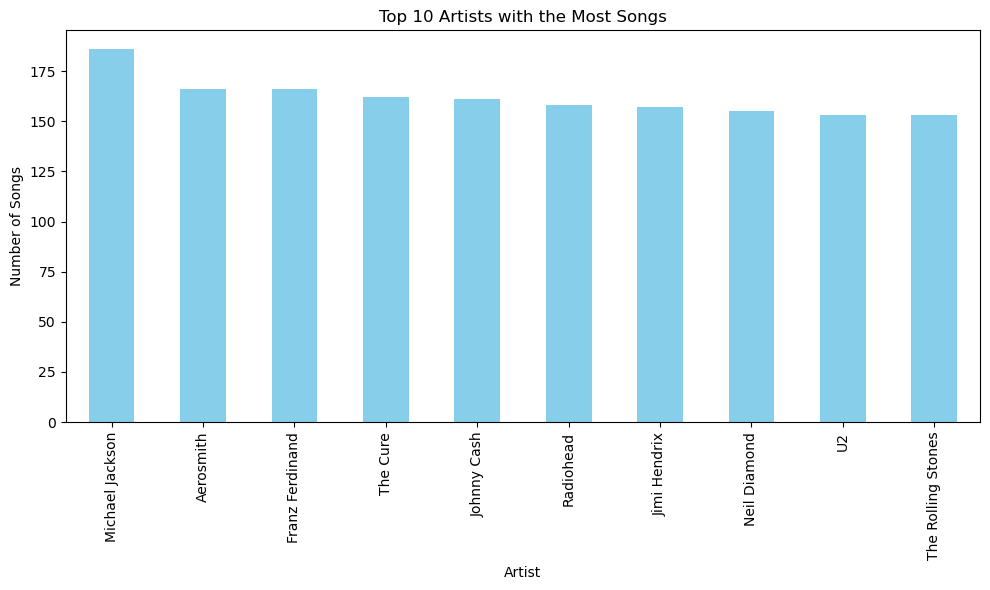

In [21]:
# Bar chart for the top 10 artists with the most songs
top_artists = df['artist_name'].value_counts().head(10)
top_artists.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Artists with the Most Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')

# Add this line to avoid the UserWarning
plt.tight_layout()

# Add this line to display the plot inline
%matplotlib inline

plt.show()

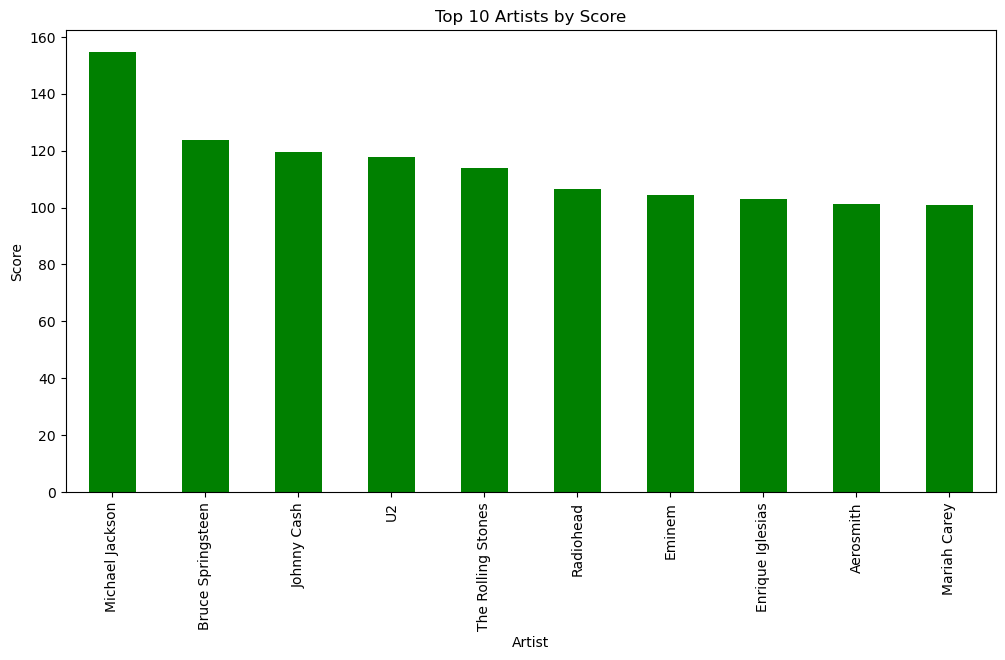

In [22]:
# Calculate the cumulative score for each artist
artist_by_score = df.groupby('artist_name')['score'].sum().sort_values(ascending=False)

# Select the top 10 artists by cumulative score
top_10_artists = artist_by_score.head(10)

# Bar chart for the top 10 artists by cumulative score
plt.figure(figsize=(12, 6))
top_10_artists.plot(kind='bar', color='green')
plt.title('Top 10 Artists by Score')
plt.xlabel('Artist')
plt.ylabel('Score')
plt.show()

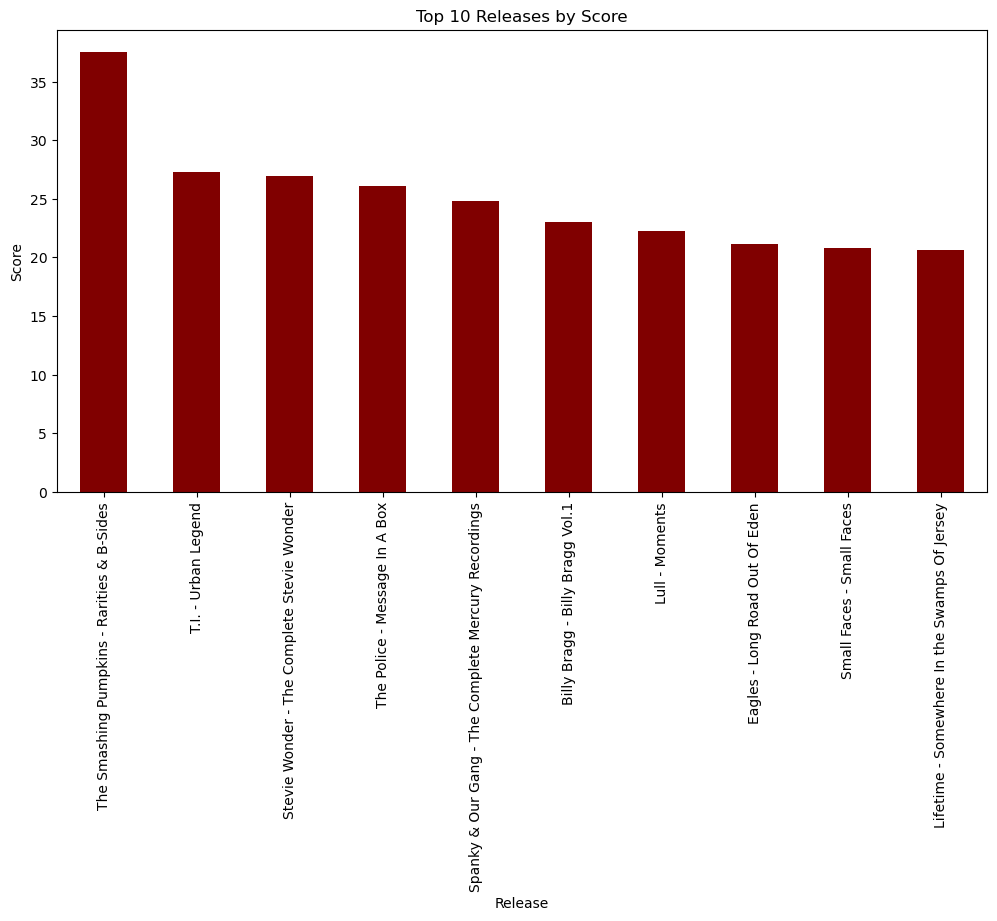

In [23]:
# Calculate the cumulative score for each artist
release_score = df.groupby('artist_release')['score'].sum().sort_values(ascending=False)

# Select the top 10 artists by score
top_10_artists = release_score.head(10)

# Bar chart for the top 10 releases by score
plt.figure(figsize=(12, 6))
top_10_artists.plot(kind='bar', color='maroon')
plt.title('Top 10 Releases by Score')
plt.xlabel('Release')
plt.ylabel('Score')
plt.show()

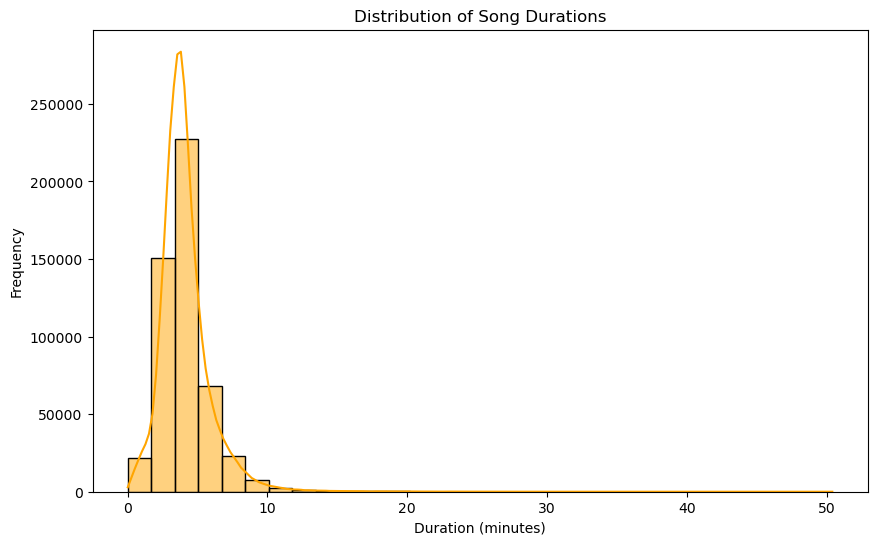

In [24]:
# Distribution of song durations using a histogram (in minutes)
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_minutes'], bins=30, kde=True, color='orange')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

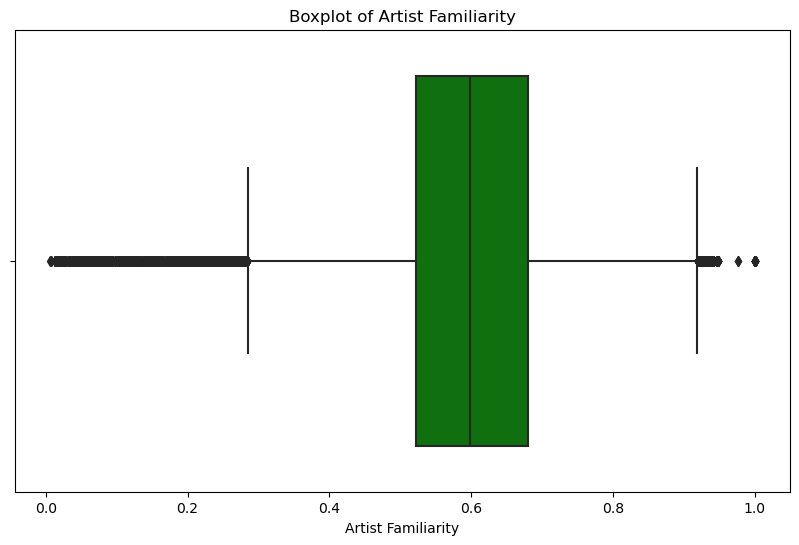

In [25]:
# Boxplot to visualize the spread of artist familiarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='artist_familiarity', data=df, color='green')
plt.title('Boxplot of Artist Familiarity')
plt.xlabel('Artist Familiarity')
plt.show()

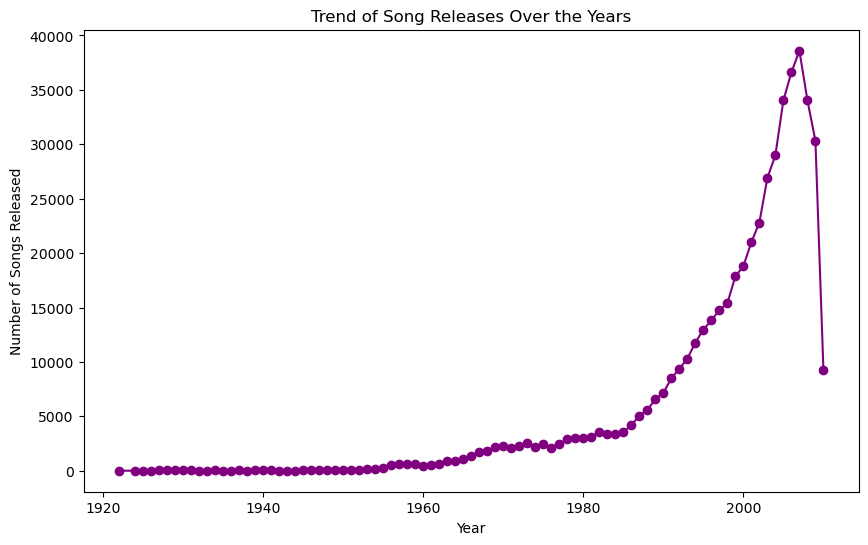

In [26]:
# Line plot to show the trend of song releases over the years
release_years = df.groupby('year').size()
release_years.plot(kind='line', marker='o', linestyle='-', color='purple', figsize=(10, 6))
plt.title('Trend of Song Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.show()

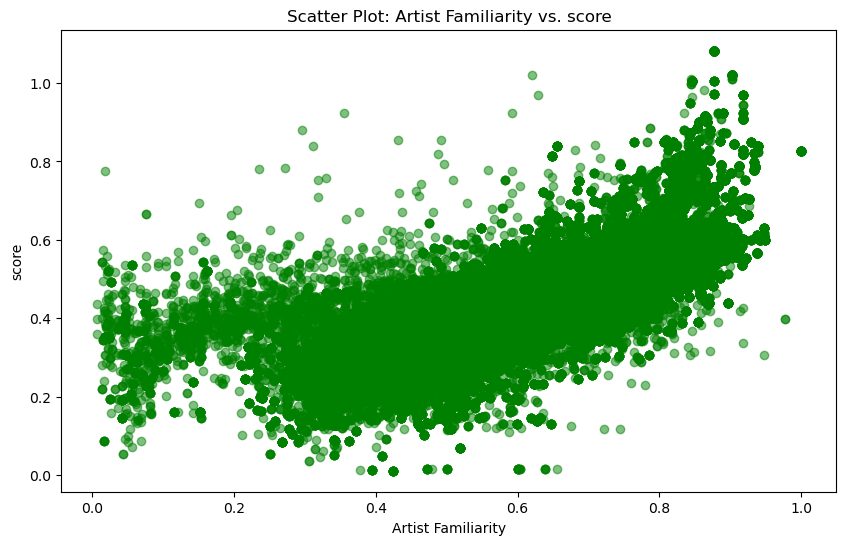

In [27]:
# Scatter plot of artist familiarity vs. score
plt.figure(figsize=(10, 6))
plt.scatter(df['artist_familiarity'], df['score'], alpha=0.5, color='green')
plt.title('Scatter Plot: Artist Familiarity vs. score')
plt.xlabel('Artist Familiarity')
plt.ylabel('score')
plt.show()

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='artist_familiarity', y='score', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Artist Familiarity vs. score with Regression Line')
plt.xlabel('Artist Familiarity')
plt.ylabel('score')
plt.show()

In [ ]:
# Scatter plot of song duration vs. score
plt.figure(figsize=(10, 6))
sns.scatterplot(y='duration_minutes', x='score', data=df, alpha=0.5, color='blue')
plt.title('Scatter Plot: Song Duration vs. Score')
plt.ylabel('Song Duration (minutes)')
plt.xlabel('Score')
plt.show()

In [ ]:
# Scatter plot of artist familiarity vs. song duration with size variation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_familiarity', y='duration_minutes', size='duration', data=df, alpha=0.7, palette='viridis')
plt.title('Scatter Plot: Artist Familiarity vs. Song Duration')
plt.xlabel('Artist Familiarity')
plt.ylabel('Song Duration (minutes)')
plt.show()